## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how = 'left', on= 'Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = merge_df['Mouse ID'].count()
mouse_count_unique = merge_df['Mouse ID'].nunique()
print(f'Total Number of Mice in the data set :{mouse_count_unique}')
print(f'Total Number of Results in the mergerd data set:{mouse_count}')


Total Number of Mice in the data set :249
Total Number of Results in the mergerd data set:1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint_df=merge_df[['Mouse ID','Timepoint']]
duplicates_mouse_timepoint = merge_df[merge_df.duplicated(['Mouse ID','Timepoint'])]
duplicates_mouse_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouse = merge_df[merge_df.duplicated(['Mouse ID'])]
duplicates_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_df.drop_duplicates(subset =["Mouse ID","Timepoint"])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = clean_df["Mouse ID"].count()
mouse_count_clean_unique = clean_df["Mouse ID"].nunique()
print(f' Total number of records after cleaning data: {mouse_count_clean}')
print(f' Total number of unique mouse records after cleaning data: {mouse_count_clean_unique}')

 Total number of records after cleaning data: 1888
 Total number of unique mouse records after cleaning data: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_by_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_by_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_by_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_by_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_by_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.create dataframe using dictonary
summary_statistics_df = pd.DataFrame({"Mean": mean_by_regimen,
                           "Median": median_by_regimen,
                           "Variance": variance_by_regimen,
                           "Standard Deviation": std_by_regimen,
                           "SEM": sem_by_regimen})
#remove index name
summary_statistics_df.index.name=None
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_statistic_df=clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

agg_summary_statistic_df.index.name=None

agg_summary_statistic_df

Tumor Volume (mm3)                                          
                        mean     median        var       std       sem
Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin           52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril           55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol           54.331565  52.509285  66.173479  8.134708  0.596466
Placebo            54.033581  52.288934  61.168083  7.821003  0.581331
Propriva           52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane           40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn           54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

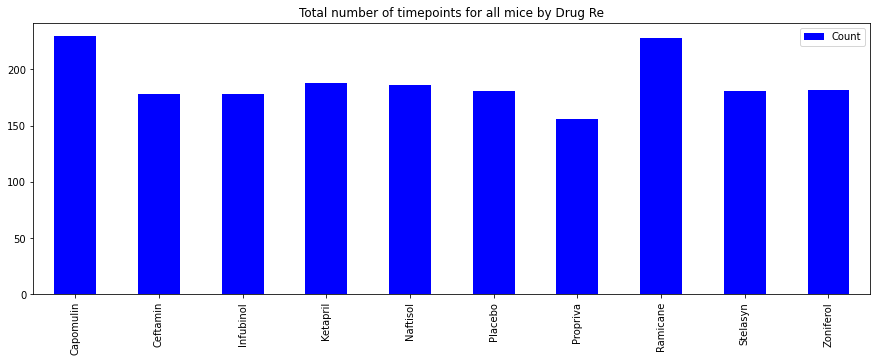

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Filter the clean data set to two columns and then group by Drug Regiment to take the count of timepoint.
drug_regimen_df = clean_df[['Drug Regimen','Timepoint']]
drug_regimen_df = drug_regimen_df.groupby('Drug Regimen').count()#.reset_index()

#Rename the Count column ID Column to 
drug_regimen_df = drug_regimen_df.rename(columns={'Timepoint':"Count"})
drug_regimen_df.index.name=None
drug_regimen_df

#plot
drug_regimen_df.plot.bar(facecolor='blue', figsize=(15,5))
plt.title("Total number of timepoints for all mice by Drug Re")

#show plot and set layout
plt.show()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

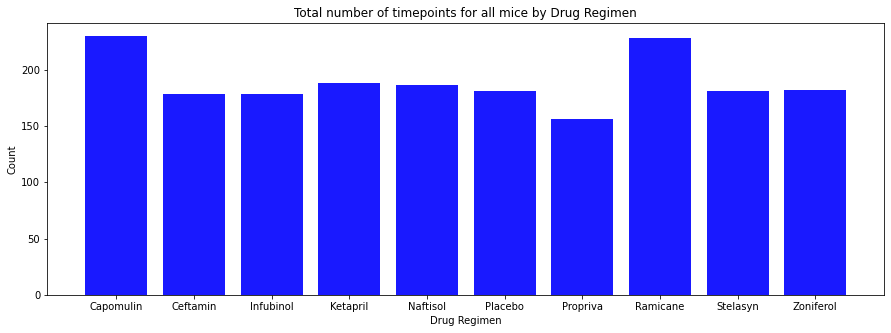

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import matplotlib.pyplot as plt
# get unique list of drug regimen
drug_regimen_list=summary_statistics_df.index.tolist()
#drug_regimen_list = clean_df['Drug Regimen'].unique().tolist()

#get count of timpoints grouped by drug regimen
drug_regimen_count = (clean_df.groupby(['Drug Regimen'])['Timepoint'].count()).tolist()
drug_regimen_count

#plot
x_axis = drug_regimen_list
plt.figure(figsize=(15,5))
plt.bar(x_axis, drug_regimen_count, color ='blue', alpha = 0.9 )
plt.title("Total number of timepoints for all mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, drug_regimen_count)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas XXXXXX    Check Incorrect
#gender_df = pd.DataFrame(clean_df.groupby(['Sex'])['Mouse ID'].count()).reset_index()
#gender_df 
#Rename the Count column ID Column to 
#gender_df = gender_df.rename(columns={'Mouse ID':"Count"})
#gender_df .index.name=None
#gender_df.plot.pie(y='Count', figsize =(6,40), shadow=True, labels=gender_df['Sex'], startangle =90, autopct = '%1.1f%%',fontsize=14, legend = False)

#plt.title("Gender Distribution")

<AxesSubplot:ylabel='Total Count'>

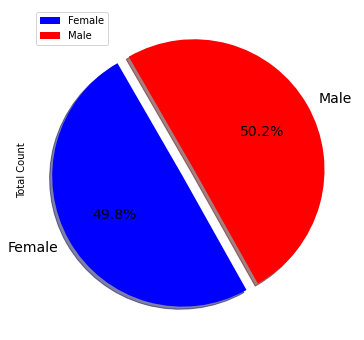

In [12]:
#Gender Distribution by unique mouse count
gender_groupby_df = clean_df.groupby(['Mouse ID','Sex'])

mouse_gender_df = pd.DataFrame(gender_groupby_df.size())
mouse_gender_df

mouse_gender=pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

colors = ['blue', 'red']
explode = (0.1, 0)

mouse_gender.plot.pie(y='Total Count', figsize =(6,6),colors=colors,explode = explode, shadow=True, startangle =120, autopct = '%1.1f%%',fontsize=14)

In [13]:
gender_count = mouse_gender['Total Count'].tolist()
gender_count

[124, 125]

([<matplotlib.patches.Wedge at 0x17676e6dfa0>,
 [Text(-1.0429948112336984, -0.5934322402259434, 'Female'),
  Text(0.9560785769642237, 0.543979553540448, 'Male')],
 [Text(-0.608413639886324, -0.346168806798467, '49.8%'),
  Text(0.5214974056168492, 0.2967161201129716, '50.2%')])

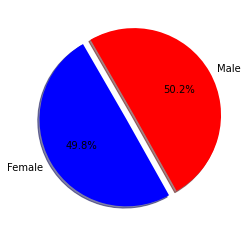

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt


labels=['Female','Male']
colors = ['blue', 'red']
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)


## Quartiles, Outliers and Boxplots

In [15]:
clean_df['Drug Regimen'].value_counts()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values().reset_index())
max_timepoint_df = max_timepoint_df.rename(columns={'Timepoint':"Max_Timepoint"})
max_timepoint_df

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_timepoint_df = pd.merge(max_timepoint_df,clean_df, on ="Mouse ID" )
merge_max_timepoint_df

,Mouse ID,Max_Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,t573,0,Ceftamin,Female,15,27,0,45.000000,0
1,u153,0,Ceftamin,Female,11,25,0,45.000000,0
2,d133,0,Zoniferol,Male,5,30,0,45.000000,0
3,n482,0,Propriva,Female,4,29,0,45.000000,0
4,o848,0,Stelasyn,Female,14,27,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1883,z969,45,Naftisol,Male,9,30,25,63.145652,2
1884,z969,45,Naftisol,Male,9,30,30,65.841013,3
1885,z969,45,Naftisol,Male,9,30,35,69.176246,4
1886,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in drug_regimen_list:
    temp_drug_df = merge_max_timepoint_df.loc[merge_max_timepoint_df['Drug Regimen'] == drug]
    #print(temp_df)
    #Max Volume Dataframe
    final_df = temp_drug_df.loc[temp_drug_df['Timepoint']==temp_drug_df['Max_Timepoint']]
    #print(tumor_volumne_df)
     
    tumor_volume_value  =final_df['Tumor Volume (mm3)'] 
    tumor_volume.append(tumor_volume_value)
    #print(tumor_volume)
    
    #IQR
    quartiles = tumor_volume_value.quantile([.25,.5,.75])
    lower_quartile=quartiles[0.25]
    upper_quartile=quartiles[0.75]
    iqr=upper_quartile- lower_quartile
    print(f'IQR for {drug}: {iqr}')
    
    #Upper and Lower Bound for outliers
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    #Outerliers
    outliers = (tumor_volume_value.loc[(final_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
  
    print(f'Total outliers for {drug} outliers: {outliers}')
 

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Total outliers for Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Total outliers for Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Total outliers for Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Total outliers for Ceftamin outliers: 0


([<matplotlib.axis.XTick at 0x17676ea4f40>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

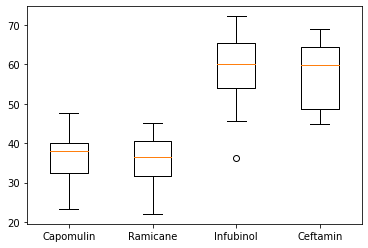

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_volume)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

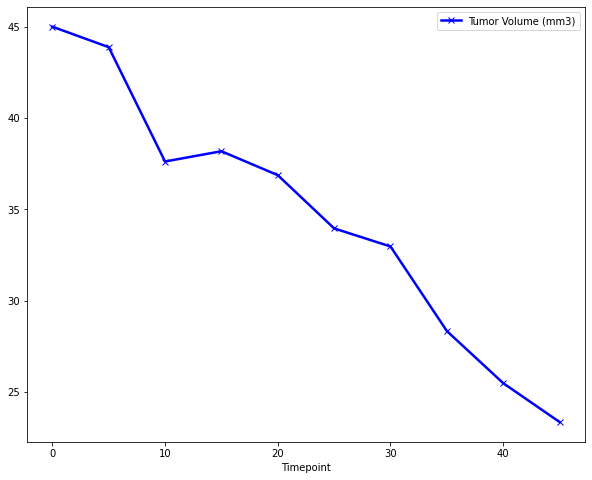

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_df
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

#Selecting a single mouse treated with Capomulin
capomulin_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
#capomulin_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "r157"]
capomulin_single_df


time_tumer_data = capomulin_single_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_tumer_data

time_tumer_data.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue',marker='x')
#plt.plot(time_tumer_data["Timepoint"], time_tumer_data["Tumor Volume (mm3)"], marker = 'x')

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [21]:
avg_capomulin_df = pd.DataFrame(capomulin_weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capomulin_df .head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


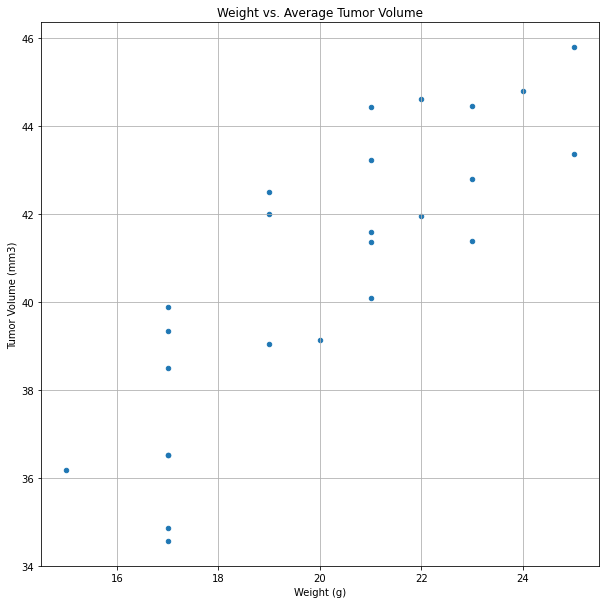

In [22]:
avg_capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,10), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
from scipy import stats 
avg_capomulin_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [24]:
weight = avg_capomulin_df['Weight (g)'].tolist()
tumor_volume = avg_capomulin_df['Tumor Volume (mm3)'].tolist()

In [25]:
correlation = st.pearsonr(weight,tumor_volume)
correlation

(0.8419363424694717, 1.322572243471279e-07)

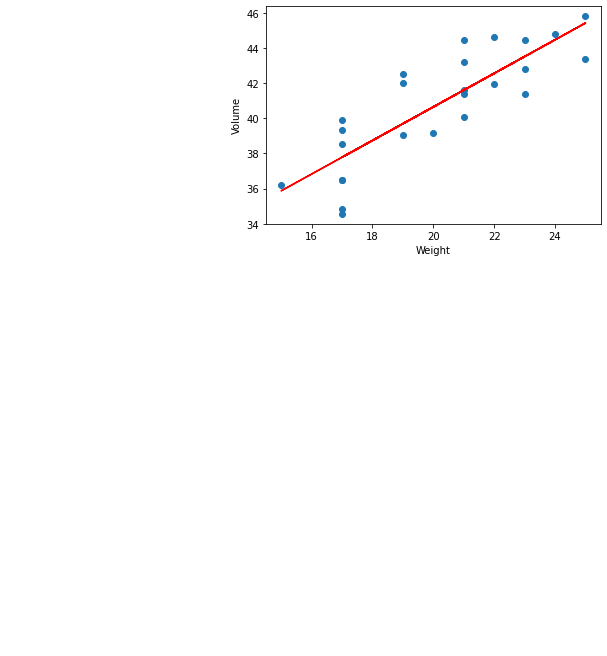

In [26]:
x_value=avg_capomulin_df['Weight (g)']
y_value=avg_capomulin_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_fit= x_value * slope + intercept

linear = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)

plt.plot(x_value,regress_fit,"r-")

plt.annotate(linear,(6,10),fontsize=15,color="red")

plt.xlabel('Weight')
plt.ylabel('Volume')
plt.show()